<a href="https://colab.research.google.com/github/diegovasconcelo/AI_robotics_seminar-TP4/blob/main/TP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Work #4

## Statement of the Activity
The owner of a shopping mall, for their strategic marketing planning, needs to segment and analyze consumer behavior. For this purpose, a database is available that contains information on age, gender, annual income, and spending score (a score assigned based on the propensity to spend; the higher the score, the more willing the consumer is to buy. This score ranges from 1 to 99).

---
[Kaggle (s.f.). Mall Customer Segmentation Data.](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?resource=download)

## Prepare the environment

In [1]:
import os

import kagglehub as kgh
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


## Load the **dataset**

In [ ]:
# [Option 1] If you have the dataset in your local machine, you can load it using the following code:
# csv_file_path='Mall_Customers.csv'


In [2]:
# [Option 2] Download latest version of the dataset from Kaggle
path = kgh.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

# Find the CSV file within the downloaded directory
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(path, filename)
        break  # Stop searching after finding the first CSV file

100%|██████████| 1.55k/1.55k [00:00<00:00, 2.45MB/s]

Extracting files...


In [3]:
# Load the dataset
df = pd.read_csv(csv_file_path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Data Analysis (EDA)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non

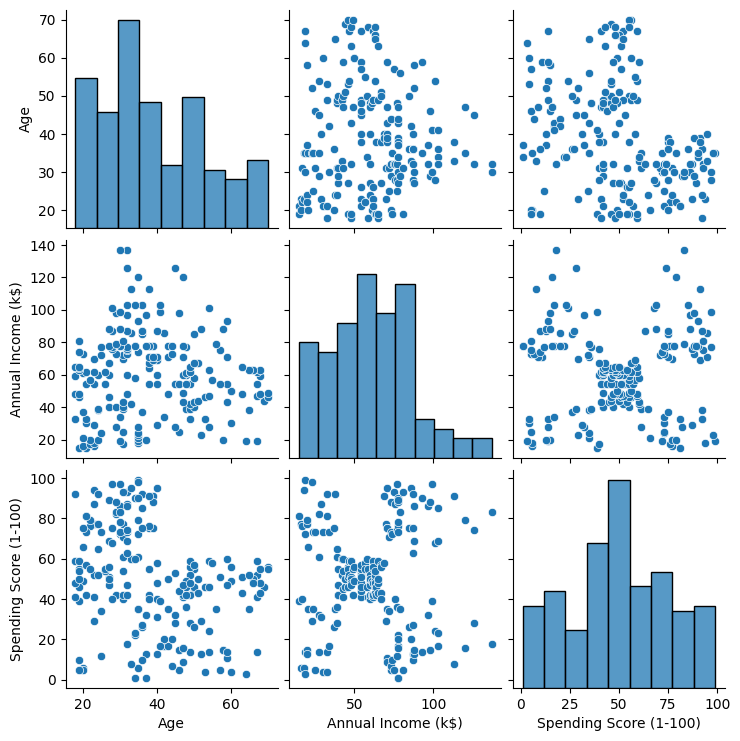

In [4]:
# Display the first 5 rows of the dataset
print(df.head())

# Display the last 5 rows of the dataset
print(df.tail())

# Basic information about the dataset
print(df.info())

#  Distribution of numerical variables
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

In [5]:
# Encode the Gender variable to numerical values
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [6]:
# Check the data types
df.dtypes

,0
CustomerID,int64
Gender,int64
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


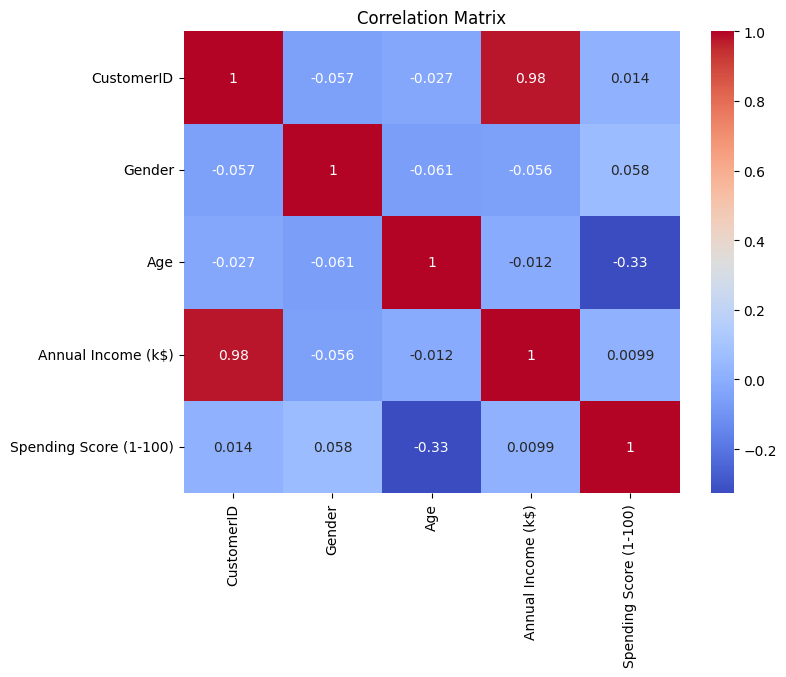

In [7]:
# Correlation between variables
corr = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 2. Data Preprocessing
Transform categorical data and scale numerical variables.

In [8]:
scaler = StandardScaler()
df[['Age', 'Annual Income (k$)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)']])

## 3. Split the Dataset into Training and Testing Sets

In [9]:
X = df[['Gender', 'Age', 'Annual Income (k$)']]
y = df['Spending Score (1-100)']

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 4. Train the Linear Regression Model
Train the model to "learn" the relationship between the features (Gender, Age, Annual Income) and the target variable (Spending Score).

In [10]:
# Create the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = model.predict(X_test)

## 5. Evaluate the Model Performance
Measure the performance using metrics such as Mean Squared Error (MSE) and R² Score.

* MSE (Mean Squared Error): Indicates how far the predictions are from the actual values.
* R² Score: Indicates how well the predictions fit the actual data (a value close to 1 is ideal).

In [11]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Squared Error (MSE): 480.67
R² Score: 0.03


## 6. Visualize the Results
Plot of the predictions versus the actual values to understand how the model performs.


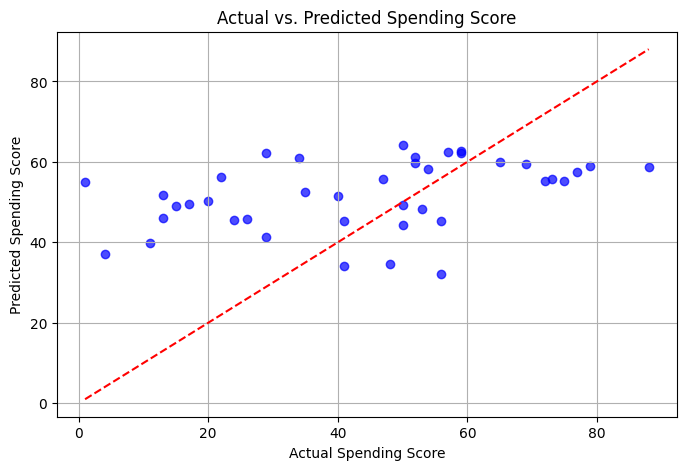

In [14]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Spending Score')
plt.ylabel('Predicted Spending Score')
plt.title('Actual vs. Predicted Spending Score')
plt.grid(True)
plt.show()